## ANOVA

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("data/anova_sample.txt", sep = "\t")

In [7]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [8]:
df_melt = pd.melt(df.reset_index(), id_vars = ["index"], value_vars = ["A", "B", "C", "D"])

In [9]:
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

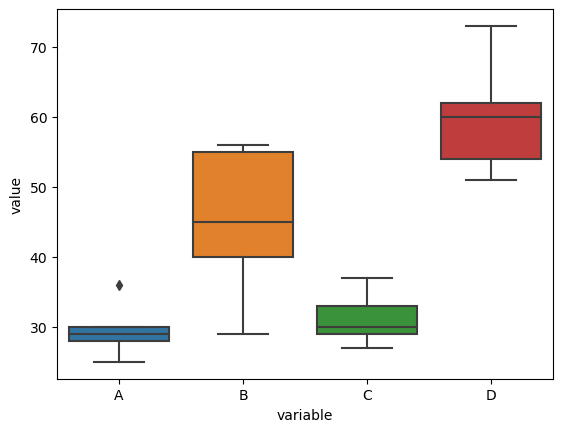

In [11]:
ax = sns.boxplot(x = "variable", y = "value", data = df_melt)

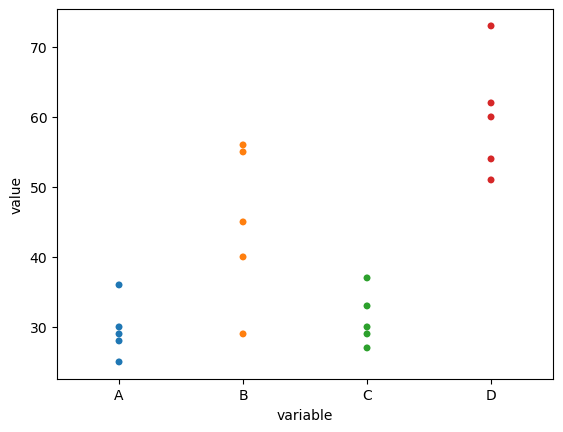

In [12]:
ax = sns.swarmplot(x = "variable", y = "value", data = df_melt)

In [13]:
import scipy.stats as stats

In [14]:
fvalue, pvalue = stats.f_oneway(df["A"], df["B"], df["C"], df["D"])

In [15]:
fvalue, pvalue

(17.492810457516338, 2.639241146210922e-05)

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
model = ols("value ~ C(variable)", data = df_melt).fit()
anova_table = sm.stats.anova_lm(model, type = 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


## Test du Student

In [28]:
X1 = [1, 1, 1, 2, 1]
X2 = [4, 2, 3, 1, 1]

In [29]:
X1, X2

([1, 1, 1, 2, 1], [4, 2, 3, 1, 1])

In [30]:
x1, pval1 = stats.shapiro(X1)
x2, pval2 = stats.shapiro(X2)

In [31]:
pval1, pval2

(0.00013097876217216253, 0.4211485683917999)

In [32]:
y = stats.ttest_ind(X1, X2)

In [33]:
y

Ttest_indResult(statistic=-1.6222142113076257, pvalue=0.14341462050621775)

## Test du χ²

In [34]:
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]

In [36]:
df = pd.DataFrame(data, columns = ["Age Group", "Political Affiliation"])

In [37]:
df

,Age Group,Political Affiliation
0,18-29,Conservative
1,18-29,Conservative
2,18-29,Conservative
3,18-29,Conservative
4,18-29,Conservative
...,...,...
1184,65 & older,Socialist
1185,65 & older,Other
1186,65 & older,Other
1187,65 & older,Other


In [40]:
df["Age Group"].value_counts()

45-65         440
30-44         345
18-29         213
65 & older    191
Name: Age Group, dtype: int64

In [41]:
df["Political Affiliation"].value_counts()

Conservative    626
Socialist       544
Other            19
Name: Political Affiliation, dtype: int64

In [42]:
data_crosstab = pd.crosstab(df["Age Group"],
                            df["Political Affiliation"],
                            margins = True, margins_name = "Total")

In [43]:
data_crosstab

Political Affiliation,Conservative,Other,Socialist,Total
Age Group,,,,
18-29,141,4,68,213
30-44,179,7,159,345
45-65,220,4,216,440
65 & older,86,4,101,191
Total,626,19,544,1189


In [44]:
rows = df["Age Group"].unique()

In [45]:
rows

array(['18-29', '30-44', '45-65', '65 & older'], dtype=object)

In [46]:
columns = df["Political Affiliation"].unique()

In [47]:
columns

array(['Conservative', 'Socialist', 'Other'], dtype=object)

In [51]:
chi_square, p_value, deg_lib, expected = stats.chi2_contingency(data_crosstab.values[:-1, :-1])

In [52]:
print("Statistique du chi2 :", chi_square)
print("Degrés de liberté :", deg_lib)
print("P-value :", p_value)

Statistique du chi2 : 24.367421717305206
Degrés de liberté : 6
P-value : 0.00044690833914947634


## Test de Wilcoxon

In [58]:
df = pd.read_csv("data/blood_pressure.txt", sep = "\t")

In [59]:
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [60]:
df[["bp_before", "bp_after"]].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


<AxesSubplot:>

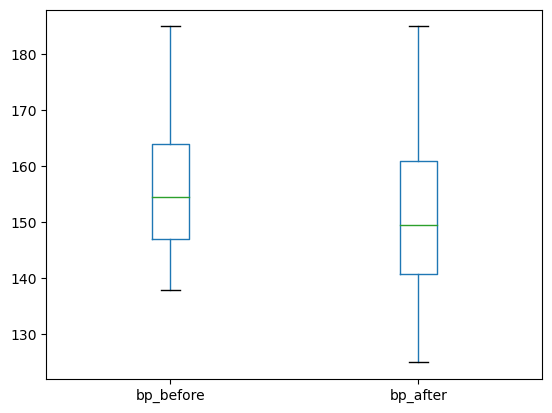

In [63]:
df.boxplot(column = ["bp_before", "bp_after"], grid = False)

((array([-2.52654228, -2.1978944 , -2.0086642 , -1.8721281 , -1.76356639,
         -1.67252351, -1.59354821, -1.5234211 , -1.46007481, -1.40209915,
         -1.3484871 , -1.29849326, -1.25154963, -1.20721295, -1.16513026,
         -1.12501567, -1.08663416, -1.04979006, -1.01431855, -0.98007946,
         -0.94695242, -0.9148333 , -0.8836313 , -0.85326673, -0.82366923,
         -0.79477627, -0.76653206, -0.73888652, -0.71179451, -0.68521516,
         -0.65911132, -0.6334491 , -0.60819743, -0.58332778, -0.55881382,
         -0.53463119, -0.51075726, -0.48717098, -0.46385269, -0.44078394,
         -0.41794744, -0.39532687, -0.37290682, -0.35067268, -0.32861058,
         -0.3067073 , -0.28495019, -0.26332716, -0.24182657, -0.2204372 ,
         -0.19914822, -0.17794913, -0.15682971, -0.13578003, -0.11479034,
         -0.09385111, -0.07295295, -0.05208661, -0.03124292, -0.0104128 ,
          0.0104128 ,  0.03124292,  0.05208661,  0.07295295,  0.09385111,
          0.11479034,  0.13578003,  0.

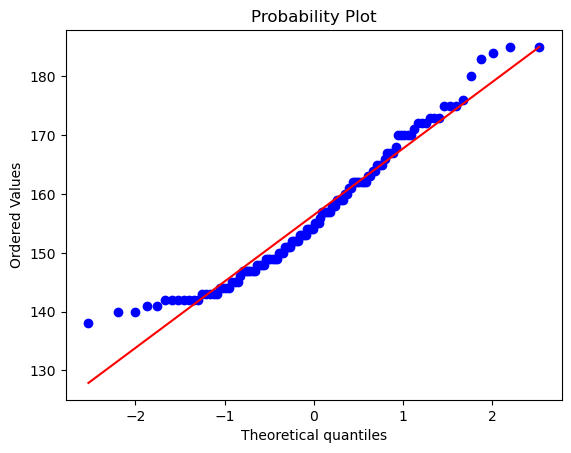

In [64]:
stats.probplot(df["bp_before"], dist = "norm", plot = plt)

((array([-2.52654228, -2.1978944 , -2.0086642 , -1.8721281 , -1.76356639,
         -1.67252351, -1.59354821, -1.5234211 , -1.46007481, -1.40209915,
         -1.3484871 , -1.29849326, -1.25154963, -1.20721295, -1.16513026,
         -1.12501567, -1.08663416, -1.04979006, -1.01431855, -0.98007946,
         -0.94695242, -0.9148333 , -0.8836313 , -0.85326673, -0.82366923,
         -0.79477627, -0.76653206, -0.73888652, -0.71179451, -0.68521516,
         -0.65911132, -0.6334491 , -0.60819743, -0.58332778, -0.55881382,
         -0.53463119, -0.51075726, -0.48717098, -0.46385269, -0.44078394,
         -0.41794744, -0.39532687, -0.37290682, -0.35067268, -0.32861058,
         -0.3067073 , -0.28495019, -0.26332716, -0.24182657, -0.2204372 ,
         -0.19914822, -0.17794913, -0.15682971, -0.13578003, -0.11479034,
         -0.09385111, -0.07295295, -0.05208661, -0.03124292, -0.0104128 ,
          0.0104128 ,  0.03124292,  0.05208661,  0.07295295,  0.09385111,
          0.11479034,  0.13578003,  0.

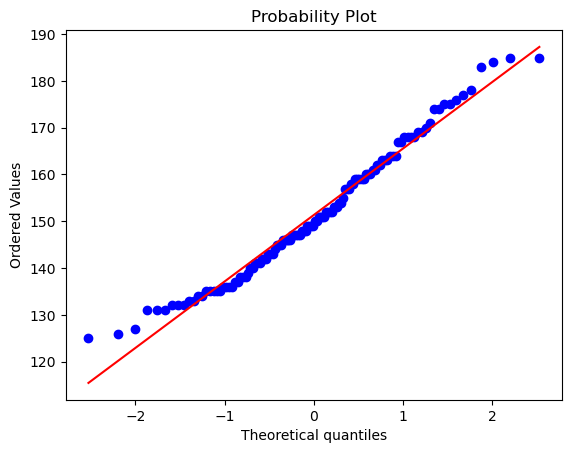

In [65]:
stats.probplot(df["bp_after"], dist = "norm", plot = plt)